# Fábio Gonçalves
## Sprint #4 - Covid API Data
https://covid19-api.vost.pt/

**HTML_CODES**  
https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status


**Usage of**
* resquests
* pandas
* graphics
* functions
* widgets

**Objectives**
1. From COVID API import data using funcions and requests
1. Convert ```['confirmados_novos', 'internados', 'internados_uci']``` to pandas
1. Describe ```['confirmados_novos', 'internados', 'internados_uci']```
1. Make a Box plot of ``['confirmados_novos', 'internados', 'internados_uci']```
1. Make a evolution plot of confirmados_novos with moving average
1. Make a Widget version with selection dates and combo box
1. Make a summary conclusion

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd 

def print_table(data_incio,data_fim):
    
    result = requests.get(f'https://covid19-api.vost.pt/Requests/get_entry/{data_incio}_until_{data_fim}')
    
    if result.status_code==200:
        data_pack = ['confirmados_novos', 'internados', 'internados_uci']
        datas = result.json()['data'].values()
        dict_ = {}
        for el in data_pack:
            dict_[el] = result.json()[(el)].values()
            #table_center=table_int.style.set_properties(**{'text-align': 'center'})
            df = pd.DataFrame(dict_ , datas)
            #df.tail()
        return df
    else:
        print('Error fetching data')
        
def plot_grafico(table_covid):
    
    graph=table_covid.plot().plot(figsize=(16,9)) #NÃO AUMENTA O TAMANHO
    plt.grid()
    plt.title('Gráfico de evlução do Covid19 nos ultimos 3 meses')
    plt.ylabel('Nº de pessoas')
    plt.xlabel('Data')
    return graph

def box_plot_grafico(table_covid):
    
    confirmados_novos=table_covid['confirmados_novos']
    internados=table_covid['internados']
    internados_uci=table_covid['internados_uci']
    df=internados.boxplot()
    return print(df)
        

In [2]:
#Print tabela de covid dentro de um range de datas
table_covid=print_table('11-05-2021', '10-08-2021')
table_covid


,confirmados_novos,internados,internados_uci
11-05-2021,268,257.0,71.0
12-05-2021,485,248.0,71.0
13-05-2021,436,244.0,70.0
14-05-2021,450,236.0,72.0
15-05-2021,469,223.0,71.0
...,...,...,...
05-08-2021,2581,898.0,196.0
06-08-2021,2377,866.0,194.0
07-08-2021,2621,838.0,186.0
08-08-2021,1982,849.0,184.0


<function __main__.plot_grafico(table_covid)>

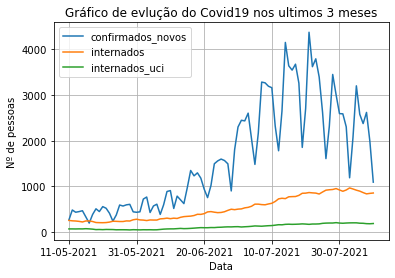

In [3]:
#plt grafico dos casos nos utimos 3 meses
plot_grafico(table_covid)
plot_grafico

In [4]:
#box plot dos casos nos utimos 3 meses
box_plot_grafico(table_covid)
#box_plot_grafico

AttributeError: 'Series' object has no attribute 'boxplot'